# DTSC670: Foundations of Machine Learning Models
## Module 3
## Assignment 6: Classification System Metrics

#### Name: Trenton Middleton

Begin by writing your name above.

# Introduction

The purpose of this assignment is to familiarize you with the metrics used to measure prediction performance in classification systems.  Suppose there 20 binary observations whose target values are:

$$[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]$$

Suppose that your machine learning model returns prediction probabilities ([predict_proba()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) in sklearn) of:

$$[0.886, 0.375, 0.174, 0.817, 0.574, 0.319, 0.812, 0.314, 0.098, 0.741, 0.847, 0.202, 0.31 , 0.073, 0.179, 0.917, 0.64 , 0.388, 0.116, 0.72]$$



# Calculate Model Predictions

Begin by writing a function from scratch called `predict()` that accepts as input a list of prediction probabilities and a threshold value, and computes the final predictions to be output by the model.  If a prediction probability value is less than or equal to the threshold value, then the prediction is the negative case (i.e. 0).  If a prediction probability value is greater than the threshold value, then the prediction is the positive case (i.e. 1).

In [1]:
# Define the predict function with an output
# If probs >= to thresh then 1 if <= thresh then 0
def predict(probs,thresh):
    output = []
    for i in range(len(probs)):
        if probs[i] >= thresh: 
            output.append(1) 
        else:
            output.append(0)
    return output

Next, invoke the `predict()` function to calculate the model predictions using the threshold value of 0.5.  Create a variable called `thresh` that has the value 0.5, and create a list of all the prediction probabilities listed in the problem statement above. Name the list of provided prediction probablities `probs`, the threshold value `thresh`, and the list of computed model predictions `preds` in your code.

In [2]:
# probs and thresh provided from the downloaded sheet
probs = [0.886,0.375,0.174,0.817,0.574,0.319,0.812,0.314,0.098,0.741,0.847,
         0.202,0.31,0.073,0.179,0.917,0.64,0.388,0.116,0.72]
thresh = 0.5

# invoke the predict() function of probs and thresh
preds = predict(probs, thresh)
print("Model Predictions: ", preds)


Model Predictions:  [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]


# Calculate the Model Accuracy

Write a function from scratch called `acc_score()` that accepts as input a list of true labels and a list of model predictions, and calculates the model accuracy.

In [3]:
# Define acc_score to calcualte model accuracy. This finds all True postive and true negative
def acc_score(labels,model_prediction):
    input = 0
    for i in range(len(labels)):
        if labels [i] == model_prediction [i]:

# adds a number to each value where lable IS EQUAL to model prediction.  
            input +=1
# take the total inputs above and divide by the total number in the range.  In this example it would be 17/20 = 0.85
    input = input/len(labels)
    return input


Next, compute the accuracy score using your function `acc_score`, and pass as input the true labels and the model predictions you calculated above.  Create a list called `labels` containing the target values listed in the problem statement above.

In [4]:
# Labels = Target values from instructions at the top of the page
labels = [1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1]

# accuracy = target values from instructions on top compared to the model prediction values from first claculation 
accuracy = acc_score(labels, preds)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.85


Next, use the Scikit-Learn's [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function to check that the value you computed using `acc_score()` is correct.

In [5]:
# This process skips the acc_score function.  It uses Scikit learn to use the orginal target values (labels) from the top of
# the page and the predicted values (preds) from the predict() function
from sklearn.metrics import accuracy_score

print (accuracy_score(labels, preds))


0.85


# Calculate the Model Error Rate

Write a function from scratch called `error_rate()` that accepts as input a list of true labels and a list of model predictions, and calculates the model error rate.  Your `error_rate()` function should use the `acc_score()` function you previosuly defined.

In [6]:
# define function for error rate = 1- accuracy score.  In this case 0.15

def error_rate(true_values, model_prediction):
    error = 1 - accuracy
    return error

    

Next, compute the model error rate for the true labels and the model predictions.  Name the error rate that you calculate `error` in your code.

In [7]:
# Use the error rate function to the true labels from the top and the model prediction from 1st calcualtions
# QUESTION SHOULD I ROUND??
error = error_rate(labels, preds)
print("Model Error Rate: ", error)

Model Error Rate:  0.15000000000000002


# Calculate the Model Precision and Recall

Write a function from scratch called `prec_recall_score()` that accepts as input a list of true labels and a list of model predictions.  `prec_recall_score()` should compute and return _both_ the model precision and recall.  Do not use the built-in Scikit-Learn functions `precision_score()`,`recall_score()`, `confusion_matrix()`, or Panda's `crosstab()` to do this.  Instead, you may use those functions after to verify your calculations. We want to ensure that you understand what is going on behind-the-scenes of the precision and recall functions by creating similar ones from scratch.

In [8]:
# define a fucntion prec_recall_score to compare true values (labels) to predicted values (model_prediction)
# Below define results of True Postive (TP), True Negative (TN), False Positive (FP), and Fasle Negative (FN)

def prec_recall_score(labels, model_prediction):
        TP = 0
        TN = 0
        FP = 0
        FN = 0
        for i in range(len(labels)):
# True postive = true lable 1 AND prediction 1
            if labels [i] == 1 and model_prediction [i] == 1:
                TP +=1
# True negative = true lable 0 AND prediction 0
            if labels [i] == 0 and model_prediction [i] == 0:
                TN +=1
# False postive = true lable 0 minus prediction 1 = -1 
            if labels [i] - model_prediction [i] == -1:
                FP +=1
# False negative = true lable 1 minus prediction 0 = +1
            if labels [i] - model_prediction [i] == 1:
                FN +=1
# formula from lecture
        precision = TP / (TP+FP)  
        recall = TP / (TP+FN)  
        return precision, recall

Use your `prec_recall_score` function to compute `precision` and `recall` for the true labels and the model predictions you calculated previously.

In [9]:
# call function prec_recall_score and print results
precision, recall = prec_recall_score(labels, preds)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.7777777777777778
Recall =  0.875


Next, use Scikit-Learn's `precision_score()` and `recall_score()` to verify that your calculations above are correct:

In [10]:
# This next 2 cells skips the prec_recall_score function.  It uses Scikit learn to use the orginal target values (labels) 
# from the top of the page and the predicted values (preds) from the predict() function

from sklearn.metrics import precision_score, recall_score
precision_score (labels, preds)

0.7777777777777778

In [11]:
recall_score (labels, preds)

0.875

# Calculate $F_\beta$ Scores

Write a function from scratch called `f_beta` that computes the $F_\beta$ measure for any value of $\beta$.  This function must invoke the `prec_recall_score` function you wrote above in order to obtain the values for precision and recall.  The function must take as input (in this exact order) the true labels provided, the model predictions you calculated previously, and the value of $\beta$ you wish to use in the calculation.  We defined $F_\beta$ in class to be:

$$ F_\beta = \frac{(\beta^2+1) \cdot Pr \cdot Re}{\beta^2 \cdot Pr + Re} $$

In [12]:
# define f_beta function
def f_beta (labels, model_prediction, beta_value):
    f_beta = 0

# call the prec_recall_score fucntion from above    
    precision, recall = prec_recall_score(labels, preds)

# formula above for f_beta    
    f_beta = ((beta_value**2 +1) * precision * recall) / (beta_value**2 * precision + recall)
    return f_beta

Next, use your `f_beta` function to compute the $F_1$ score for the true labels and the model predictions you calculated previously.

In [13]:
# call f_beta function above using values of labels, preds and 1.  I used 1 becaseu it matched the scikit learn value below
F1 = f_beta(labels, preds, 1)
print("F1 = ", F1)

F1 =  0.823529411764706


Verify your above calculation is correct by invoking Scikit-Learn's `f1_score` function.

In [14]:
#combine precsion and recall togehter via scikit-learns f1_score function to compare with above
from sklearn.metrics import f1_score
f1_score (labels, preds)

0.823529411764706

# Calculate the TPR and FPR for ROC Curve

In the subsequent cells, you will be asked to plot an ROC curve.  The ROC curve plots the True Positive Rate (TPR, also called recall) against the False Positive Rate (FPR).  Both of these are scalar values, akin to precision and recall.

Write a function from scratch called `TPR_FPR_score` that is nearly identical to `prec_recall_score` that you wrote previously, which computes and returns TPR and FPR.

TPR and FPR are defined as follows:

$$ TPR = recall = \frac{TP}{TP + FN} $$

$$ FPR = \frac{FP}{FP + TN} $$

In [15]:
# similar to the prec_recall_score function.  I just changed the formual outputs and the return values at the bottom
def TPR_FPR_score(labels, model_prediction):
        TP = 0
        TN = 0
        FP = 0
        FN = 0
        for i in range(len(labels)):
# True postive = true lable 1 and prediction 1
            if labels [i] == 1 and model_prediction [i] == 1:
                TP +=1
# True negative = true lable 0 and prediction 0
            if labels [i] == 0 and model_prediction [i] == 0:
                TN +=1
# False postive = true lable 0 minus prediction 1 = -1 
            if labels [i] - model_prediction [i] == -1:
                FP +=1
# False negative = true lable 1 minus prediction 0 = +1
            if labels [i] - model_prediction [i] == 1:
                FN +=1
# formula from above
        TPR = TP / (TP+FN)
        FPR = FP / (FP+TN)   
        return TPR, FPR

# Compute and Plot the ROC Curve

Write a function from scratch called `roc_curve_computer` that accepts (in this exact order) as input the true labels and prediction probabilities provided in the problem statement, as well as a list of threshold values.  The function must compute and return the True Positive Rate (TPR, also called recall) and the False Positive Rate (FPR) (these are both scalar values) for each threshold value in the list that is passed to the function.  

The TPR will be plotted against the FPR in what is called the Receiver Operating Characteristic (ROC) curve. Your task now is to create the plot of the [ROC](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html). 

The function you will write behaves identically to Scikit-Learn's [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) function, except that it will take the list of thresholds in as input rather than return them as output.  Your function must calculate one value of TPR and one value of FPR for each of the threshold values in the list.  You will then take these TPR and FPR values, and plot them against each other to create the ROC curve.

You must not use any built-in library function to perform the calculation of a performance metric.  You may of course use common, built-in Python functions, such as: `range()`, `len()`, et cetera.

Be sure to reuse functions and code segments from your work above!

As an example, calling the `roc_curve_computer` function with the input `true_labels = [1, 0, 1, 0, 0]`, `pred_probs = [0.875, 0.325, 0.6, 0.09, 0.4]`, and `thresholds = [0.00, 0.25, 0.50, 0.75, 1.00]` yields the output `TPR =  [1.0, 1.0, 1.0, 0.5, 0.0]` and `FPR =  [1.0, 0.6666, 0.0, 0.0, 0.0]`.

In [16]:
def roc_curve_computer(labels,prob,thres):
# created a list
    tpr_list = []
    fpr_list = []
# set range equal to the number of items in the threshold.  So will create 101 TPR and FPR results  
    for i in range(len(thres)):
# call predict function from above to predict probablities from thresholds 
        preds = predict(prob,thres[i])
# inserted the try / except block becaseu I was getting a divide by zero error
        try:
# calling TPR_FPR function previously created
            tpr, fpr = TPR_FPR_score(labels, preds)
            tpr_list.append(tpr)
            fpr_list.append(fpr)
        except ZeroDivisionError:
            tpr,fpr = 0,0
    return tpr_list,fpr_list

Next, use your `roc_curve_computer` function along with the threshold values `thresholds = [x/100 for x in range(101)]` to compute the TPR and FPR lists for the provided data.

In [17]:
# provided from the download
thresholds = [x/100 for x in range(101)]
TPR, FPR = roc_curve_computer(labels, probs, thresholds)

Use the following funtion to plot the ROC curve.  Pass the FPR and TPR that you calculated above as into to the function.

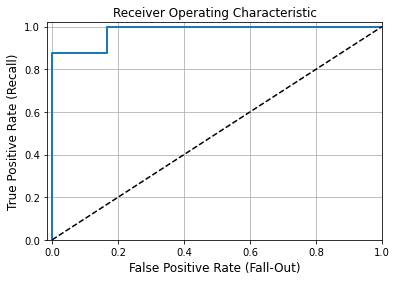

In [18]:
# import matplotlib for plotting.  
import matplotlib as mpl
import matplotlib.pyplot as plt

# provided from the download
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
    plt.title('Receiver Operating Characteristic', fontsize=12)
    plt.axis([-0.015, 1.0, 0, 1.02])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.grid(True)

plt.figure(figsize=(6, 4))
plot_roc_curve(FPR, TPR)
plt.show()

Next, compare your plot to the plot generated by Scikit-Learns `roc_curve` function.  Use Scikit-Learns `roc_curve` function to calculate the false positive rates and the true positive rates.

In [19]:
# From scikit learn the roc_curve function 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve (labels, probs)

Pass the false positive rates and the true positive rates obtained above via the Scikit-Learn functions as input to the `plot_roc_curve` function in order to compare ROC curves:

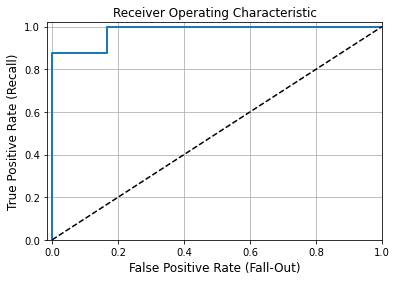

In [20]:
# provided from the download
plt.figure(figsize=(6, 4))
plot_roc_curve(fpr, tpr)
plt.show()